In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from transformers import pipeline

In [43]:
# Data Ingestion
def upload_and_clean_data():
    uploaded = files.upload()
    for file_name in uploaded.keys():
        print(f"Uploaded file: {file_name}")
        data = pd.read_csv(file_name)

        # Remove empty columns
        data = data.drop(columns=['status_id','Column1', 'Column2', 'Column3', 'Column4'])

        # Replace status types
        data['status_type'] = data['status_type'].replace({'status': 'text', 'link': 'hyperlink'})


        return data
data.head()
data = upload_and_clean_data()

Saving Live_20210128.csv to Live_20210128.csv
Uploaded file: Live_20210128.csv


Summary Statistics:
       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  
count  7050.000000  7050.000000  7050.000000  7050.000000  
mean      1.289362     0.696454     0.243688     0.113191  
std       8.719650     3.957183     1.597156     0.726812  
min       0.000000     0.000000     0.000000  

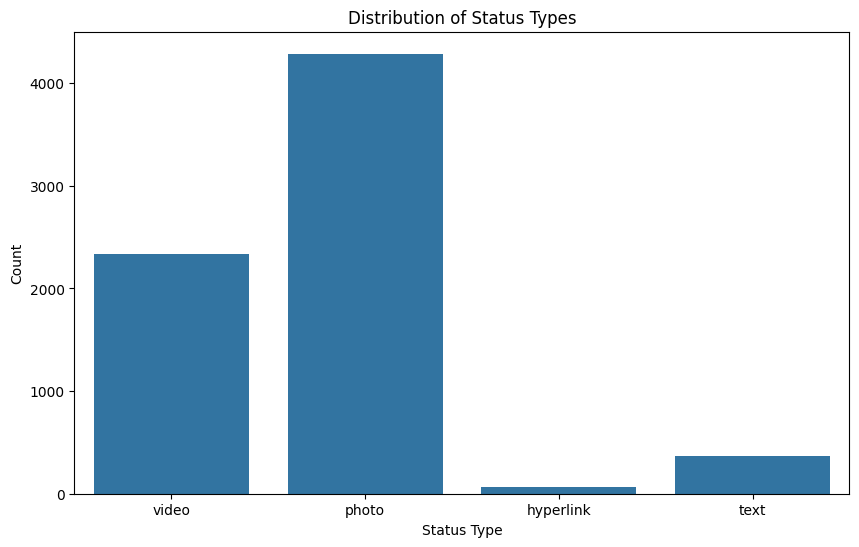

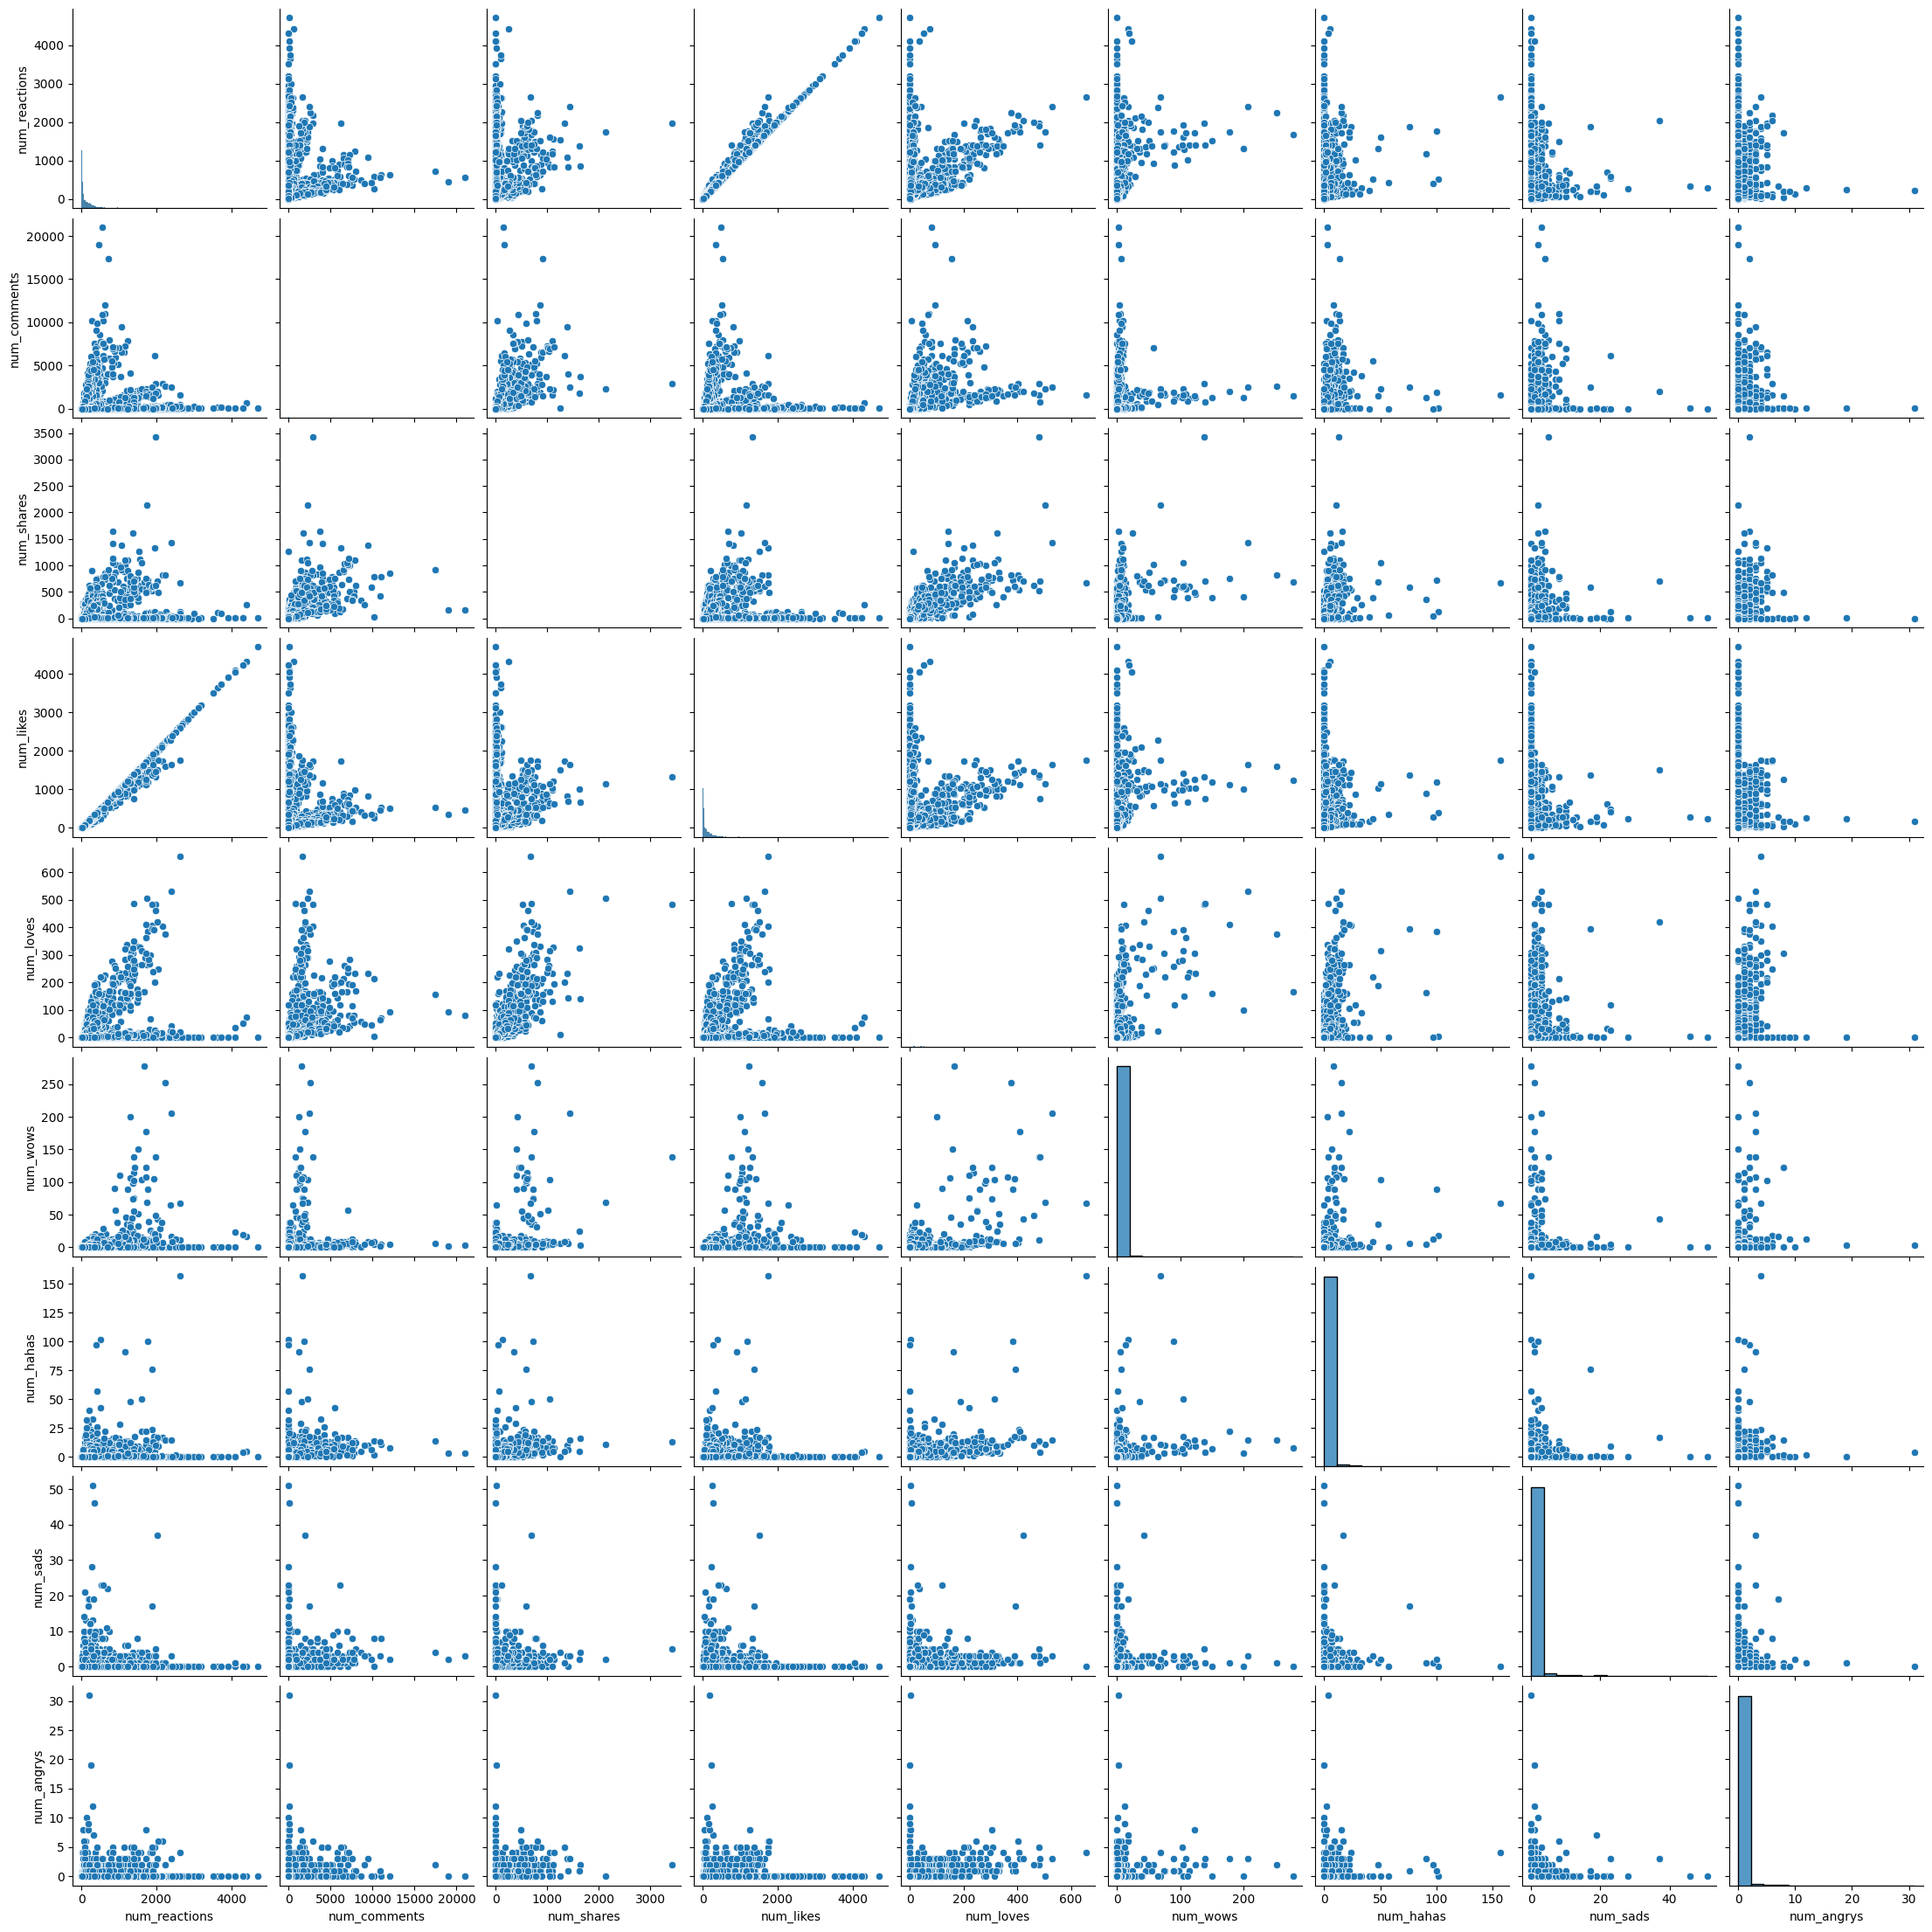

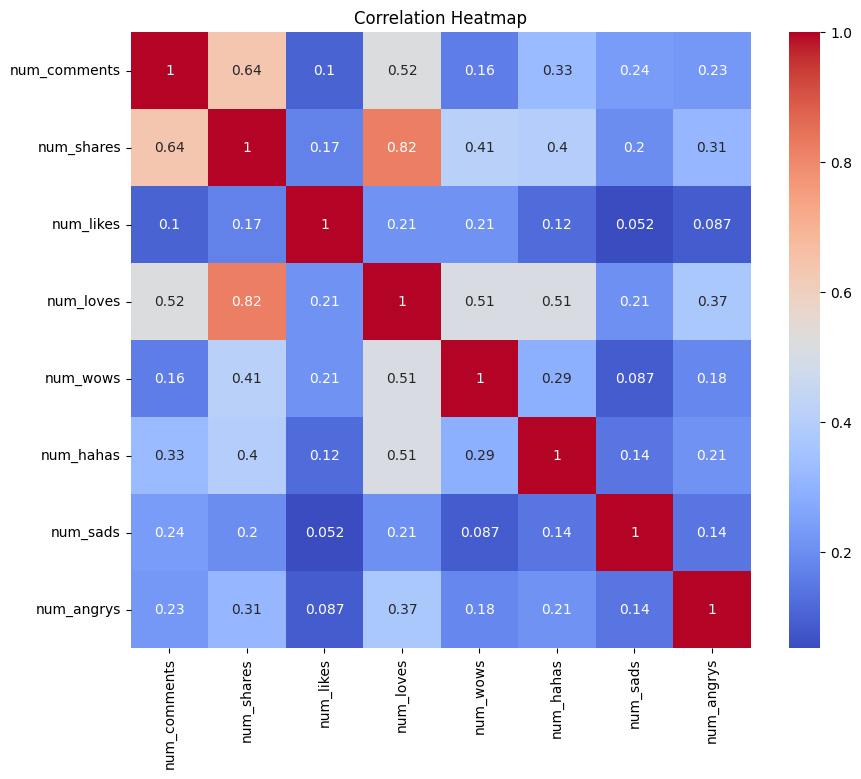

In [44]:
# EDA Functions
def summary_statistics(data):
    print("Summary Statistics:")
    print(data.describe())

def plot_status_types_distribution(data):
    plt.figure(figsize=(10,6))
    sns.countplot(x='status_type', data=data)
    plt.title('Distribution of Status Types')
    plt.xlabel('Status Type')
    plt.ylabel('Count')
    plt.show()

def plot_performance_metrics(data):
    sns.pairplot(data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']])
    plt.show()

def plot_correlation_heatmap(data):
    plt.figure(figsize=(10,8))
    # Exclude non-numeric columns and 'num_reactions'
    numeric_data = data.select_dtypes(include=['number']).drop(columns=['num_reactions'])
    corr_matrix = numeric_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

summary_statistics(data)
plot_status_types_distribution(data)
plot_performance_metrics(data)
plot_correlation_heatmap(data)

Mean Squared Error: 262.1860798607106


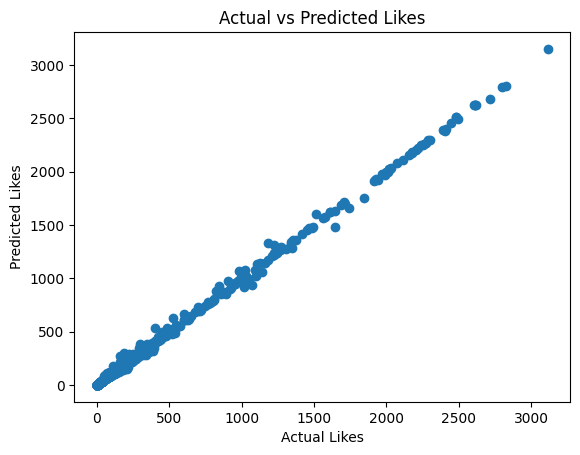

In [45]:
# Performance Correlation
def advanced_model(data):
    X = data[['num_reactions', 'num_comments', 'num_shares']]
    y = data['num_likes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f"Mean Squared Error: {mse}")

    plt.scatter(y_test, predictions)
    plt.xlabel("Actual Likes")
    plt.ylabel("Predicted Likes")
    plt.title("Actual vs Predicted Likes")
    plt.show()

advanced_model(data)

  data['num_likes'].resample('M').sum().plot()



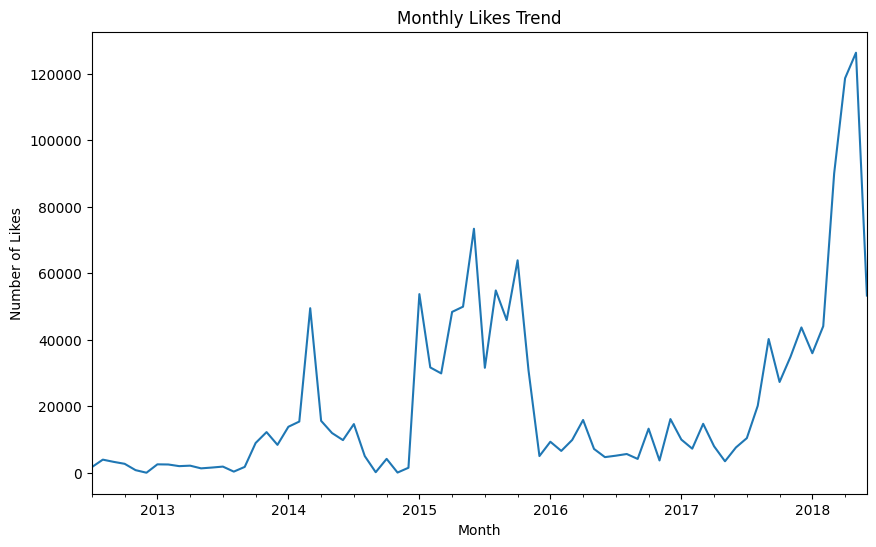

In [46]:
# Time Series Analysis
def analyze_trends(data):
    data['status_published'] = pd.to_datetime(data['status_published'])
    data.set_index('status_published', inplace=True)

    plt.figure(figsize=(10,6))
    data['num_likes'].resample('M').sum().plot()
    plt.title('Monthly Likes Trend')
    plt.xlabel('Month')
    plt.ylabel('Number of Likes')
    plt.show()

analyze_trends(data)

In [47]:
# Automated Insights and Recommendations
def generate_insights(data):
    insights = []
    if data['num_likes'].mean() > 100:
        insights.append("The average number of likes is high. Consider posting similar content.")
    if data['num_comments'].mean() < 10:
        insights.append("The average number of comments is low. Encourage more engagement.")

    for insight in insights:
        print(insight)

generate_insights(data)

The average number of likes is high. Consider posting similar content.
